In [51]:
# data analysis
import numpy as np
import pandas as pd

# data visualization
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline


data = pd.read_csv(r'D:\OneDrive\OneDrive - WFT\Compartido\Well_Datasets\La_Calera_Pluspetrol\Post_Process\append\out\raw_full.csv')

print("Data Loaded OK")



Data Loaded OK


In [86]:
#well['CHOKE'].unique()

data.columns

Index(['Unnamed: 0', 'DATE & TIME', 'CHOKE', 'WELL Name', 'Test',
       'Well Head Pressure  psig', 'Well Head Temp deg C',
       'Sep. Static Pressure psig', 'Sep. Gas Temp deg C',
       'Gas Spec. Gravity air=1', 'Gas Rate Sm3/d', 'Gas Cumm. Sm3',
       'GOR (Gas/Oil Ratio) m3/m3', 'Oil Density  g/cm3', 'Oil Temp deg C',
       ' Raw Oil Flow  m3/d', 'Oil Flow Sm3/d', 'Water Flow Rate m3/d',
       'WaterDensity Kg/m3', 'Flow Water Cut  %', 'DP[Bar]', 'Temperature[C]',
       'Velocity[m/s]', 'Quality', 'GVF[%]', 'GasDen[kg/m3]', 'GasVisc[cP]',
       'LiqDen[kg/m3]', 'LiqVisc[cP]', 'filename', 'Qg[m3/d]', 'Ql[m3/d]',
       'Qo[m3/d]', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

ETL process


In [80]:
well = data[['DATE & TIME', 'CHOKE', 'WELL Name', 'Test', 'Well Head Pressure  psig',
       'Well Head Temp deg C', 'Sep. Static Pressure psig',
       'Sep. Gas Temp deg C', 'Gas Rate Sm3/d',
       'Gas Cumm. Sm3', 'GOR (Gas/Oil Ratio) m3/m3', 'Oil Density  g/cm3',
       'Oil Temp deg C', ' Raw Oil Flow  m3/d', 'Oil Flow Sm3/d',
       'Water Flow Rate m3/d', 'WaterDensity Kg/m3', 'Flow Water Cut  %','DP[Bar]', 'Temperature[C]',
       'Velocity[m/s]', 'Quality',       
       'GVF[%]','GasDen[kg/m3]','GasVisc[cP]', 
       'LiqDen[kg/m3]', 'LiqVisc[cP]','Qg[m3/d]', 'Ql[m3/d]','Qo[m3/d]']]

well = well[well['CHOKE']!='-']

#well = well[well['CHOKE']=='40']

#for print
import matplotlib.pyplot as plt
# Import necessary packages
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

def well_print(well):
    fig, ax = plt.subplots(3,figsize=(22,8),sharex=True)
    wellname = 'Well Name: ' + well['WELL Name'].iloc[1]
    fig.suptitle(wellname)

    well.plot(x='DATE & TIME', y='Gas Rate Sm3/d',color='orange',ax=ax[0])
    well.plot(x='DATE & TIME', y='Oil Flow Sm3/d',color='green',ax=ax[1])
    well.plot(x='DATE & TIME', y='Water Flow Rate m3/d',color='blue',ax=ax[2])
    
    ax[0].set(title="Gas Flow Rate")
    ax[1].set(title="Oil Flow Rate")
    ax[2].set(title="Water Flow Rate")
   
    plt.show()
    
    
#to avoid no flow moments

well = well[well['CHOKE']!='-']
well.dropna(subset=['Gas Rate Sm3/d', 'Oil Flow Sm3/d'], axis=0, inplace=True)
well.isnull().sum()

well['GOR'] = well['Gas Rate Sm3/d'] / well['Oil Flow Sm3/d']
well['GWR'] = well['Gas Rate Sm3/d'] / well['Water Flow Rate m3/d']
well['WLR'] = well['Water Flow Rate m3/d'] / (well['Oil Flow Sm3/d']+well['Water Flow Rate m3/d'])

#slice PAD G2 data, selecting last operation month
well = well.drop(well[(well['Test'] == 'PAD-G2') & (well['CHOKE'] != '40') & (well['DATE & TIME'] <= '2020-10-24 06:00:00')].index)


#well = well.set_index('DATE & TIME')

#well.index = pd.to_datetime(well.index)

#well = well['2020-10-24 06:00:00':'2020-11-24 18:00:00']

#well.reset_index(level=0, inplace=True)

#ect

well.dropna(subset=['GOR', 'GWR', 'WLR'], axis=0, inplace=True)
well.isnull().sum()

well = well[well['GOR']!=0]
well = well[well['GOR']<=15000]

#slice sep test with no importance

well = well[well['Test'] != 'sep-movil-r1']
#well1 = well1[well1['Meter'] != 'sep-movil-r2']
well = well[well['Test'] != 'sep-movil-r3']

# to change categories

well['Meter'] = well['Test'].map(lambda x: 'RAW_FSF' if x=='sep-movil-r5-fsf' else x)
well['Meter'] = well['Meter'].map(lambda x: 'PVT1' if x=='PVT1' else x)
well['Meter'] = well['Meter'].map(lambda x: 'PVT2' if x=='PVT2' else x)
well['Meter'] = well['Meter'].map(lambda x: 'PVT3' if x=='PVT3' else x)
well['Meter'] = well['Meter'].map(lambda x: 'PVT4' if x=='PVT4' else x)
well['Meter'] = well['Meter'].map(lambda x: 'PVT5' if x=='PVT5' else x)
well['Meter'] = well['Meter'].map(lambda x: 'PVT6' if x=='PVT6' else x)
well['Meter'] = well['Meter'].map(lambda x: 'PVT7' if x=='PVT7' else x)
well['Meter'] = well['Meter'].map(lambda x: 'PVT8' if x=='PVT8' else x)
well['Meter'] = well['Meter'].map(lambda x: 'PVT9' if x=='PVT9' else x)
well['Meter'] = well['Meter'].map(lambda x: 'PVT10' if x=='PVT10' else x)
well['Meter'] = well['Meter'].map(lambda x: 'C1-038' if x=='C1-038' else x)
well['Meter'] = well['Meter'].map(lambda x: 'Post-Processed' if x=='C1-052' else x)
well['Meter'] = well['Meter'].map(lambda x: 'C1-08125' if x=='C1-08125' else x) 
well['Meter'] = well['Meter'].map(lambda x: 'C1-0.2' if x=='C1-0.2' else x)
well['Meter'] = well['Meter'].map(lambda x: 'PVT11' if x=='PVT11' else x)

well['Meter'] = well['Meter'].map(lambda x: x if x=='RAW_FSF' or x=='PVT1' or x=='PVT2'or x=='PVT3' or x=='PVT4' or x=='PVT5' or x=='PVT6' or x=='PVT7' 
                                  or x=='PVT8' or x=='PVT9' or x=='PVT10' or x=='C1-038' or x=='Post-Processed' or x=='C1-08125' or x=='C1-0.2' or x=='PVT11'
                                  else 'SEP')

#well['Meter'] = well['Test']

# add pad information

well['pad'] = well['WELL Name'].map(lambda x: 'G2' if x=='LCA-3083' or x=='LCA-3084' or x=='LCA-3085' else x)
well['pad'] = well['pad'].map(lambda x: 'G7' if x=='LCA-3005' or x=='LCA-3006' or x=='LCA-3007' else x)
well['pad'] = well['pad'].map(lambda x: 'G8' if x=='LCA-3008' or x=='LCA-3009' or x=='LCA-3010' else x)
well['pad'] = well['pad'].map(lambda x: 'K3' if x=='LCA-3011' or x=='LCA-3012' or x=='LCA-3013' else x)
well['pad'] = well['pad'].map(lambda x: '3001' if x=='LCA-3001' else x)


C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



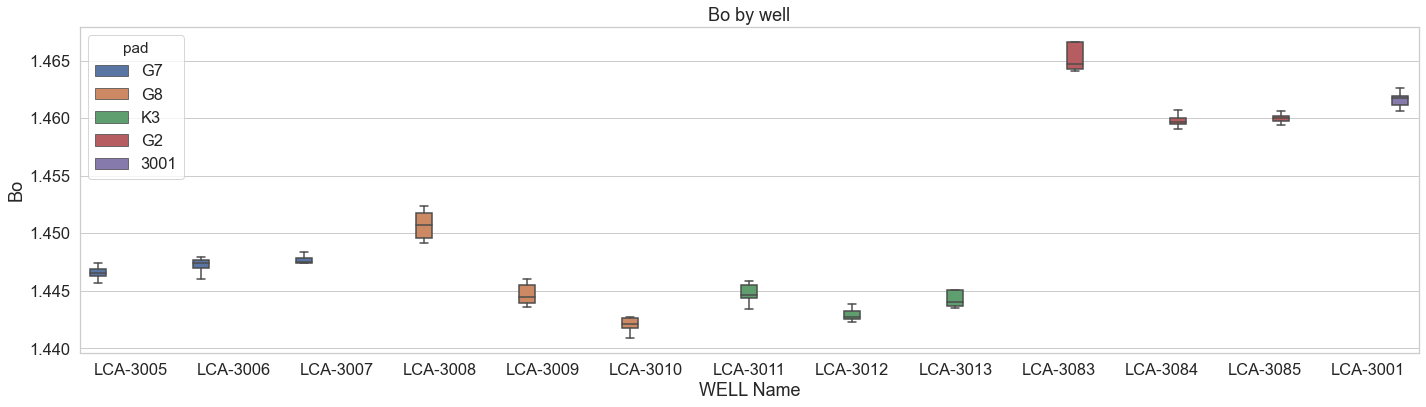

['Post-Processed']


In [88]:
well1 = well.copy()


well1 = well1[well1['Sep. Static Pressure psig']!='-']

well1['Sep. Static Pressure psig'] = well1['Sep. Static Pressure psig'].astype(float)
well1['Sep. Gas Temp deg C'] = well1['Sep. Gas Temp deg C'].astype(float)
well1['Oil Temp deg C'] = well1['Oil Temp deg C'].astype(float)

well1['shrinkage'] = well1['Oil Flow Sm3/d'] / well1[' Raw Oil Flow  m3/d']

well1['GOR'] = well1['Gas Rate Sm3/d'] / well1['Oil Flow Sm3/d']
well1['GWR'] = well1['Gas Rate Sm3/d'] / well1['Water Flow Rate m3/d']
well1['WLR'] = well1['Water Flow Rate m3/d'] / (well1['Oil Flow Sm3/d']+well1['Water Flow Rate m3/d'])

#Combined Boyle's - Charles' Gas Laws
well1['Fp'] = 1.01008 / (1.015596 + (well1['Sep. Static Pressure psig']/14.5038))
well1['Ft'] = (459.67+(well1['Sep. Gas Temp deg C']*(9/5)+32))/519.67
well1['Fz'] = 0.734285 / 0.99584   # Z from AGA8 calculators

well1['Gas Rate Act m3/d'] = well1['Gas Rate Sm3/d'] * well1['Fp'] * well1['Ft'] * well1['Fz'] 
well1['Liq Rate Act m3/d'] = well1[' Raw Oil Flow  m3/d'] + well1['Water Flow Rate m3/d']

well1['GVF'] = (well1['Gas Rate Act m3/d'] / (well1['Gas Rate Act m3/d'] + well1['Liq Rate Act m3/d']))*100


well1['Bo'] = well1[' Raw Oil Flow  m3/d'] / well1['Oil Flow Sm3/d']
#well2['GVF'].describe()
#well1.dropna(subset=['GVF', 'Bo'], axis=0, inplace=True)

#well1 = well1[well1['pad'] != '3001']


r = 0
for x in well1['Meter']:
    if x == 'Post-Processed':
        well1['Gas Rate Act m3/d'].iloc[r] = well1['Qg[m3/d]'].iloc[r]
        #print(well1.iloc[r,ix2].astype(float))
        #print(ix1)
    r = r + 1

r = 0

for x in well1['Meter']:
    if x == 'RAW_FSF':
        well1['Gas Rate Act m3/d'].iloc[r] = well1['Qg[m3/d]'].iloc[r]
        #print(well1.iloc[r,ix2].astype(float))
        #print(ix1)
    r = r + 1

well2 = well1.copy()
well2 = well2[well2['Meter'] != 'PVT1']
well2 = well2[well2['Meter'] != 'PVT2']
well2 = well2[well2['Meter'] != 'PVT3']
well2 = well2[well2['Meter'] != 'PVT4']
well2 = well2[well2['Meter'] != 'PVT5']
well2 = well2[well2['Meter'] != 'PVT6']
well2 = well2[well2['Meter'] != 'PVT7']
well2 = well2[well2['Meter'] != 'PVT8']
well2 = well2[well2['Meter'] != 'PVT9']
well2 = well2[well2['Meter'] != 'PVT10']
well2 = well2[well2['Meter'] != 'PVT11']
well2 = well2[well2['Meter'] != 'SEP']
well2 = well2[well2['Meter'] != 'C1-038']
#well2 = well1[well1['Meter'] != 'C1-052']
well2 = well2[well2['Meter'] != 'C1-08125']
well2 = well2[well2['Meter'] != 'C1-0.2']
well2 = well2[well2['Meter'] != 'XL10']
#well2 = well1[well1['Meter'] != 'RAW_FSF']

#script to reload act gas rate from mpfm meter






#fig1, ax = plt.subplots(1,2,figsize=(24,6))
fig1 = plt.subplots(figsize=(24,6))
#ax[0].set_title('GVF')
#ax[1].set_title('WLR')
#ax[2].set_title('GWR')
sns.boxplot(y='Bo', x='WELL Name', data=well2, hue='pad', orient='v' ,showfliers = False)
plt.title('Bo by well')
#sns.boxplot(y='WLR', x='pad', data=well1, hue='Meter', orient='v' , showfliers = False,ax=ax[1])
#sns.boxplot(y='GWR', x='pad', data=well1, hue='Meter',orient='v' , showfliers = False,ax=ax[2])
plt.show()

print(well2['Meter'].unique())

well2.to_csv(r'D:\OneDrive\OneDrive - WFT\Compartido\Well_Datasets\La_Calera_Pluspetrol\Post_Process\Analytics_files\df\fsf_prod.csv', index=False, encoding='utf-8-sig')

well3 = well2.copy()
well3 = well3[well3['Meter'] == 'Post-Processed']
well3.to_csv(r'D:\OneDrive\OneDrive - WFT\Compartido\Well_Datasets\La_Calera_Pluspetrol\Post_Process\Analytics_files\df\fsf_prod_post.csv', index=False, encoding='utf-8-sig')

In [91]:
well1.columns

Index(['DATE & TIME', 'CHOKE', 'WELL Name', 'Test', 'Well Head Pressure  psig',
       'Well Head Temp deg C', 'Sep. Static Pressure psig',
       'Sep. Gas Temp deg C', 'Gas Rate Sm3/d', 'Gas Cumm. Sm3',
       'GOR (Gas/Oil Ratio) m3/m3', 'Oil Density  g/cm3', 'Oil Temp deg C',
       ' Raw Oil Flow  m3/d', 'Oil Flow Sm3/d', 'Water Flow Rate m3/d',
       'WaterDensity Kg/m3', 'Flow Water Cut  %', 'DP[Bar]', 'Temperature[C]',
       'Velocity[m/s]', 'Quality', 'GVF[%]', 'GasDen[kg/m3]', 'GasVisc[cP]',
       'LiqDen[kg/m3]', 'LiqVisc[cP]', 'Qg[m3/d]', 'Ql[m3/d]', 'Qo[m3/d]',
       'GOR', 'GWR', 'WLR', 'Meter', 'pad', 'shrinkage', 'Fp', 'Ft', 'Fz',
       'Gas Rate Act m3/d', 'Liq Rate Act m3/d', 'GVF', 'Bo'],
      dtype='object')

In [6]:
sep_d = well1.set_index('DATE & TIME')

sep_d.index = pd.to_datetime(sep_d.index)

sep_d['month'] = sep_d.index.month
sep_d['year'] = sep_d.index.year
sep_d['year_month'] = sep_d['year'].map(str) + '-' + sep_d['month'].map(str) 
sep_d = sep_d.sort_values('year_month')


sep_d.groupby(['month','year'])['CHOKE', 'WELL Name', 'Test', 'Well Head Pressure  psig',
       'Well Head Temp deg C', 'Sep. Static Pressure psig',
       'Sep. Gas Temp deg C', 'Gas Rate Sm3/d', 'Gas Cumm. Sm3',
       'GOR (Gas/Oil Ratio) m3/m3', 'Oil Density  g/cm3', 'Oil Temp deg C',
       ' Raw Oil Flow  m3/d', 'Oil Flow Sm3/d', 'Water Flow Rate m3/d',
       'WaterDensity Kg/m3', 'Flow Water Cut  %', 'DP[Bar]', 'Temperature[C]',
       'Velocity[m/s]', 'Quality', 'GVF[%]', 'GasDen[kg/m3]', 'GasVisc[cP]',
       'LiqDen[kg/m3]', 'LiqVisc[cP]', 'Qg[m3/d]', 'Ql[m3/d]', 'Qo[m3/d]',
       'GOR', 'GWR', 'WLR', 'Meter', 'pad', 'shrinkage', 'Fp', 'Ft', 'Fz',
       'Gas Rate Act m3/d', 'Liq Rate Act m3/d', 'GVF', 'Bo'].mean()

wellname = sep_d['WELL Name'].unique() 

#uncomment to see the gor charts
"""
for w in wellname:
    fig1 = plt.subplots(figsize=(24,6))
    #ax[0].set_title('GVF')
    #ax[1].set_title('WLR')
    #ax[2].set_title('GWR')
    sns.boxplot(y='GOR (Gas/Oil Ratio) m3/m3', x='year_month', data=sep_d[sep_d['WELL Name']==w], orient='v' ,showfliers = False)
    plt.title(w)
    plt.show()
    #plt.savefig(r'D:\OneDrive\OneDrive - WFT\Compartido\Well_Datasets\La_Calera_Pluspetrol\Post_Process\client_pvt_ref_data\gor_by_month\gor_by_month_'+w+'.png')
#plt.close()
"""



"\nfor w in wellname:\n    fig1 = plt.subplots(figsize=(24,6))\n    #ax[0].set_title('GVF')\n    #ax[1].set_title('WLR')\n    #ax[2].set_title('GWR')\n    sns.boxplot(y='GOR (Gas/Oil Ratio) m3/m3', x='year_month', data=sep_d[sep_d['WELL Name']==w], orient='v' ,showfliers = False)\n    plt.title(w)\n    plt.show()\n    #plt.savefig(r'D:\\OneDrive\\OneDrive - WFT\\Compartido\\Well_Datasets\\La_Calera_Pluspetrol\\Post_Process\\client_pvt_ref_data\\gor_by_month\\gor_by_month_'+w+'.png')\n#plt.close()\n"

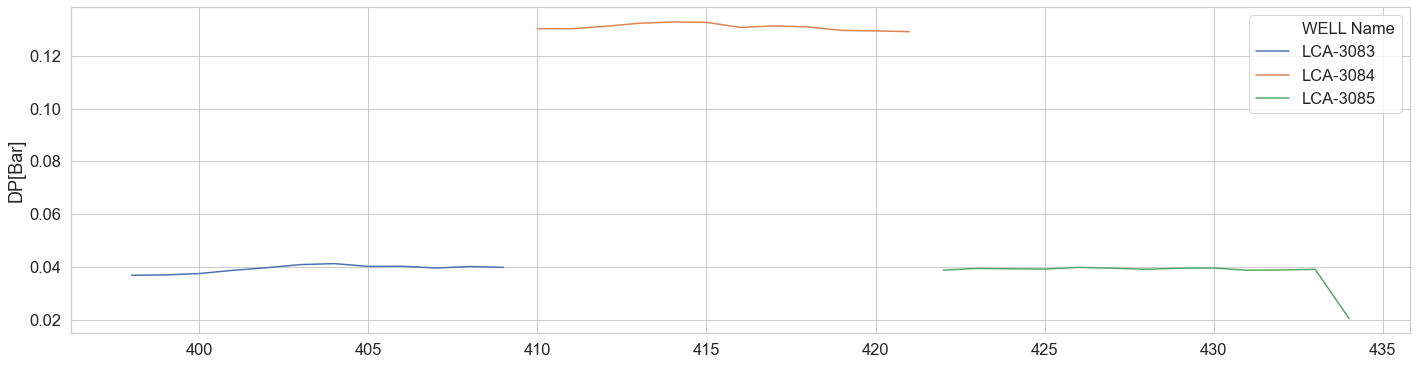

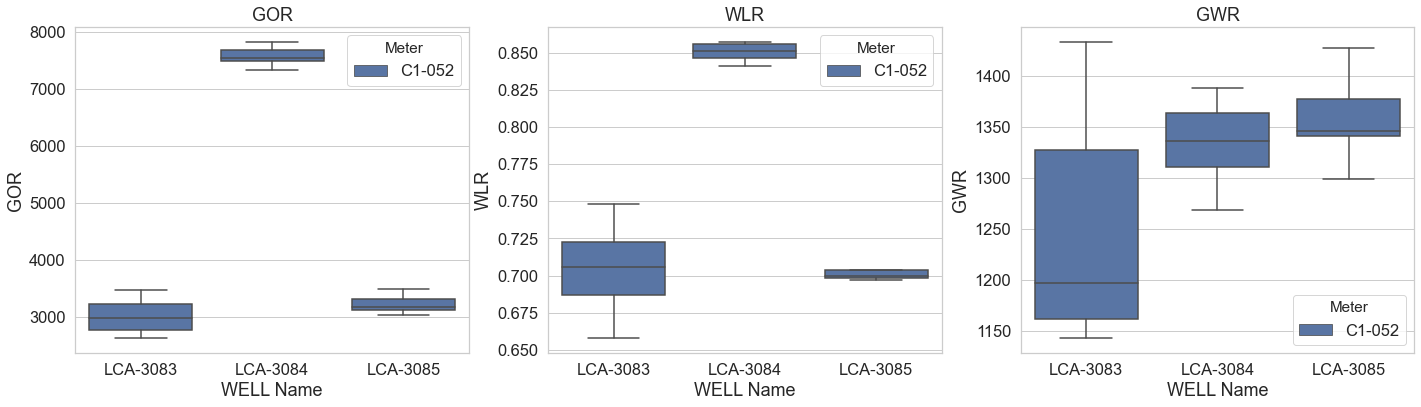

In [68]:
ds = well.copy()

ds = ds[ds['pad']=='G2']
ds = ds[ds['Meter']=='C1-052']

w = ds['WELL Name'].unique()

#ds = ds.set_index('DATE & TIME')
#ds.index = pd.to_datetime(ds.index)
#ds2 = ds.groupby(pd.Grouper(freq='1min')).mean() 
#ds2.reset_index(level=0, inplace=True)

fig1 = plt.subplots(figsize=(24,6))
sns.lineplot(x=ds.index,y='DP[Bar]',hue='WELL Name',data=ds)

"""
fig, ax = plt.subplots(2,figsize=(22,6),sharex=True)
ds.plot(y='DP[Bar]',color='black',ax=ax[0])
ds.plot(y='Velocity[m/s]',color='red',ax=ax[1])
#plt.title(w)
"""
plt.show()

fig1, ax = plt.subplots(1,3,figsize=(24,6))
ax[0].set_title('GOR')
ax[1].set_title('WLR')
ax[2].set_title('GWR')
sns.boxplot(y='GOR', x='WELL Name', data=ds, hue='Meter', orient='v' ,showfliers = False, ax=ax[0])
sns.boxplot(y='WLR', x='WELL Name', data=ds, hue='Meter', orient='v' , showfliers = False,ax=ax[1])
sns.boxplot(y='GWR', x='WELL Name', data=ds, hue='Meter',orient='v' , showfliers = False,ax=ax[2])
plt.show()

In [43]:
well1.to_csv(r'D:\OneDrive\OneDrive - WFT\Compartido\Well_Datasets\La_Calera_Pluspetrol\Post_Process\out_data_from_sep.csv')



In [28]:
r = well1.groupby(['WELL Name','Meter'])[['Bo','Sep. Static Pressure psig','Oil Temp deg C']].mean()
r.reset_index(level=0, inplace=True)
r.reset_index(level=0, inplace=True)
r.to_csv(r'D:\OneDrive\OneDrive - WFT\Compartido\Well_Datasets\La_Calera_Pluspetrol\Post_Process\hou_sim_files\to_aw\bo_from_sep.csv')
r

,Meter,WELL Name,Bo,Sep. Static Pressure psig,Oil Temp deg C
0,SEP,LCA-3001,1.601945,1342.118120,35.485641
1,SEP,LCA-3005,1.535444,1322.599781,45.456458
2,SEP,LCA-3006,1.535604,1319.151098,54.380208
3,SEP,LCA-3007,1.535106,1316.326219,51.740377
4,SEP,LCA-3008,1.536751,1316.099604,50.663469
5,SEP,LCA-3009,1.523256,1309.215917,53.380000
6,SEP,LCA-3010,1.525758,1314.943351,54.238750
7,SEP,LCA-3011,1.531549,1293.391147,53.188776
8,SEP,LCA-3012,1.530764,1293.784162,53.257708
9,SEP,LCA-3013,1.540421,1307.792723,51.780833


In [43]:
group = well1.pivot_table(index='WELL Name',columns='Meter',values='Bo',aggfunc='mean')
group

Meter,SEP
WELL Name,
LCA-3001,1.601945
LCA-3005,1.535444
LCA-3006,1.535604
LCA-3007,1.535106
LCA-3008,1.536751
LCA-3009,1.523256
LCA-3010,1.525758
LCA-3011,1.531549
LCA-3012,1.530764


In [105]:
#well1 = well1[well1['WELL Name'] != 'LCA-3001']
#well1 = well1[well1['Gas Rate Act m3/d'] <=150000]

d1 = well1.copy()

d1 = d1[d1['Meter'] != 'PVT1']
d1 = d1[d1['Meter'] != 'PVT2']
d1 = d1[d1['Meter'] != 'PVT3']
d1 = d1[d1['Meter'] != 'PVT4']
d1 = d1[d1['Meter'] != 'PVT5']
d1 = d1[d1['Meter'] != 'PVT6']
d1 = d1[d1['Meter'] != 'PVT7']
d1 = d1[d1['Meter'] != 'PVT8']
d1 = d1[d1['Meter'] != 'PVT9']
d1 = d1[d1['Meter'] != 'PVT10']
d1 = d1[d1['Meter'] != 'PVT11']
d1 = d1[d1['Meter'] != 'SEP']
d1 = d1[d1['Meter'] != 'C1-0.2']
d1 = d1[d1['Meter'] != 'C1-038']
d1 = d1[d1['Meter'] != 'C1-08125']
d1 = d1[d1['Meter'] != 'RAW_FSF']
d1 = d1[d1['Gas Rate Act m3/d'] < 150000]


d = d1.groupby(['WELL Name','Meter'])[['pad','CHOKE','Gas Rate Act m3/d','Liq Rate Act m3/d','Gas Rate Sm3/d',' Raw Oil Flow  m3/d','Oil Flow Sm3/d','Water Flow Rate m3/d','GOR','GWR','WLR','Sep. Gas Temp deg C','Sep. Static Pressure psig','DP[Bar]', 'Temperature[C]',
       'Velocity[m/s]', 'Quality',       
       'GVF[%]','GasDen[kg/m3]','GasVisc[cP]', 
       'LiqDen[kg/m3]', 'LiqVisc[cP]','GVF']].mean()
d.reset_index(level=0, inplace=True)
d.reset_index(level=0, inplace=True)

#d.to_csv(r'D:\OneDrive\OneDrive - WFT\Compartido\Well_Datasets\La_Calera_Pluspetrol\Post_Process\groupby_lc.csv')
ds = well1.groupby(['pad','Meter'])[['CHOKE','Gas Rate Act m3/d','Liq Rate Act m3/d','Gas Rate Sm3/d',' Raw Oil Flow  m3/d','Oil Flow Sm3/d','Water Flow Rate m3/d','GOR','GWR','WLR','Sep. Gas Temp deg C','Sep. Static Pressure psig','DP[Bar]', 'Temperature[C]',
       'Velocity[m/s]', 'Quality',       
       'GVF[%]','GasDen[kg/m3]','GasVisc[cP]', 
       'LiqDen[kg/m3]', 'LiqVisc[cP]','GVF']].mean()
ds.reset_index(level=0, inplace=True)
ds.reset_index(level=0, inplace=True)

#pd.pivot_table(d,index=['Meter'],values=["Gas Rate Sm3/d",'Oil Flow Sm3/d','Water Flow Rate m3/d'],aggfunc=np.sum)
#d.groupby(['WELL Name','Meter'])[['Gas Rate Sm3/d','Oil Flow Sm3/d','Water Flow Rate m3/d','GOR','GWR','WLR']].mean()


#d1
#d.columns

#d1 = ds.copy()
#d1 = d.copy()


import plotly

import plotly.graph_objs as go

# Create random data with numpy
import numpy as np
import plotly.figure_factory as ff


#by = 'pad' # 'pad' or 'WELL Name'
by = 'WELL Name'


def figures_to_html(figs, filename="dashboard3.html"):
    dashboard = open(filename, 'w')
    dashboard.write("<html><head></head><body>" + "\n")
    for fig in figs:
        inner_html = fig.to_html().split('<body>')[1].split('</body>')[0]
        dashboard.write(inner_html)
    dashboard.write("</body></html>" + "\n")


# Example figures
import plotly.express as px

fig1 = px.scatter(d1, x=by, y="GVF", color='pad', size='GVF',title="GVF Comparison")
fig2 = px.scatter(d1, x=by, y="Gas Rate Act m3/d", color='pad', size='Gas Rate Act m3/d',title="Gas Rate Line cond Comparison")
fig3 = px.scatter(d1, x=by, y=" Raw Oil Flow  m3/d", color='pad', size=' Raw Oil Flow  m3/d',title="Oil Rate Line cond Comparison")

"""

fig6 =  ff.create_table(measureOverPVT)
figures_to_html([fig1, fig2, fig3,fig4,fig5,fig6])

"""


figures_to_html([fig1,fig2,fig3])



#d3 = d[d['Meter']=='SEP']
#d3 = d3[d3['CHOKE']=='84'] 

#group = d3.pivot_table(index='WELL Name',values=['Gas Rate Act m3/d','Liq Rate Act m3/d','GVF', 'Gas Rate Sm3/d',' Raw Oil Flow  m3/d','Oil Flow Sm3/d', 'Water Flow Rate m3/d','WLR','Sep. Gas Temp deg C','Sep. Static Pressure psig'],aggfunc='mean')

#group.to_csv(r"D:\OneDrive\OneDrive - WFT\Compartido\Well_Datasets\La_Calera_Pluspetrol\Post_Process\hou_sim_files\to_aw\sep_data_avg_well.csv", index=True, encoding='utf-8-sig')

#group

group1 = d.groupby(['WELL Name','Meter'])[['Gas Rate Act m3/d','Liq Rate Act m3/d','GVF', 'Gas Rate Sm3/d',' Raw Oil Flow  m3/d','Oil Flow Sm3/d', 'Water Flow Rate m3/d','WLR','Sep. Gas Temp deg C','Sep. Static Pressure psig']].mean()
group1.reset_index(level=0, inplace=True)
group1.reset_index(level=0, inplace=True)
group1=group1.round(decimals=2)
#roundTwoDecimals = np.round(df, decimals=2)
group1[['WELL Name','Gas Rate Act m3/d','Liq Rate Act m3/d','GVF', 'Gas Rate Sm3/d',' Raw Oil Flow  m3/d','Oil Flow Sm3/d', 'Water Flow Rate m3/d','WLR','Sep. Gas Temp deg C','Sep. Static Pressure psig']].to_csv(r'D:\OneDrive\OneDrive - WFT\Compartido\Well_Datasets\La_Calera_Pluspetrol\Post_Process\Analytics_files\df\fsf_prod_post_table.csv', index=False, encoding='utf-8-sig')
group1

d1.to_csv(r'D:\OneDrive\OneDrive - WFT\Compartido\Well_Datasets\La_Calera_Pluspetrol\Post_Process\Analytics_files\df\fsf_d1.csv', index=False, encoding='utf-8-sig')


In [34]:
well[well['Meter']=='Last_C1']['WELL Name'].describe()

count          145
unique          12
top       LCA-3085
freq            13
Name: WELL Name, dtype: object

In [8]:
ref = {'Meter':'Reference','WELL Name':['LCA-3011','LCA-3001','LCA-3005','LCA-3006','LCA-3007','LCA-3008','LCA-3009','LCA-3010','LCA-3011','LCA-3012','LCA-3013','LCA-3083','LCA-3084','LCA-3085'],
                                'Gas Rate Sm3/d' : [10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000],
                                'GOR':[8130,2955,8972,4911,6352,3111,4125,3864,7222,9080,1929,2290,2011],
                                'GWR':[14385,9286,12215,14923,8586,12727,13895,1889,11471,12611,4970,4688,5469]}

well = well.append(ref,ignore_index=True)

well['Meter'].unique()

array(['C1Neg', 'Last_C1', 'PVT1', 'PVT10', 'SEP', 'PVT2', 'PVT3', 'PVT4',
       'PVT5', 'PVT6', 'PVT7', 'PVT8', 'PVT9', 'XL10', 'RAW_FSF',
       'customer'], dtype=object)

Plotting information

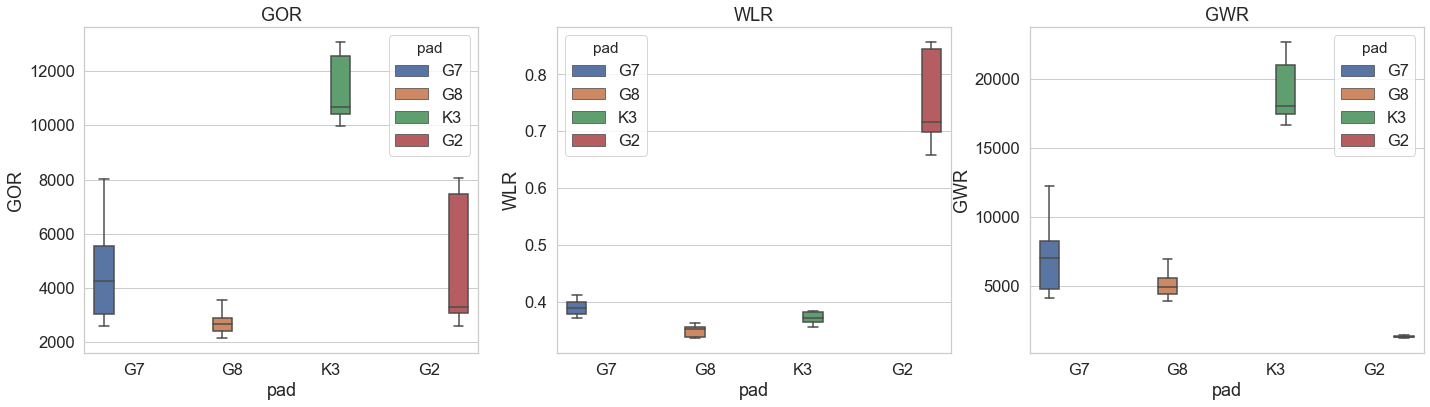

In [14]:
well1 = well.copy()

well1 = well1[well1['pad'] != '3001']


well1 = well1[well1['Meter'] != 'PVT1']
well1 = well1[well1['Meter'] != 'PVT2']
well1 = well1[well1['Meter'] != 'PVT3']
well1 = well1[well1['Meter'] != 'PVT4']
well1 = well1[well1['Meter'] != 'PVT5']
well1 = well1[well1['Meter'] != 'PVT6']
well1 = well1[well1['Meter'] != 'PVT7']
well1 = well1[well1['Meter'] != 'PVT8']
well1 = well1[well1['Meter'] != 'PVT9']
well1 = well1[well1['Meter'] != 'PVT10']
well1 = well1[well1['Meter'] != 'PVT11']
well1 = well1[well1['Meter'] != 'SEP']
well1 = well1[well1['Meter'] != 'C1-038']
#well1 = well1[well1['Meter'] != 'C1-052']
well1 = well1[well1['Meter'] != 'C1-08125']
well1 = well1[well1['Meter'] != 'C1-0.2']
well1 = well1[well1['Meter'] != 'XL10']
well1 = well1[well1['Meter'] != 'RAW_FSF']
"""

well1 = well1[well1['Meter'] != 'sep-movil-r1']
#well1 = well1[well1['Meter'] != 'sep-movil-r2']
well1 = well1[well1['Meter'] != 'sep-movil-r3']
#well1 = well1[well1['Meter'] != 'sep-movil-r4']
well1 = well1[well1['Meter'] != 'sep-movil-r5-fsf']
"""
#well1 = well1[well1['Meter'] != 'PVT10']
#well1 = well1[well1['Meter'] != 'PAD-G2']


fig1, ax = plt.subplots(1,3,figsize=(24,6))
ax[0].set_title('GOR')
ax[1].set_title('WLR')
ax[2].set_title('GWR')
sns.boxplot(y='GOR', x='pad', data=well1, hue='pad', orient='v' ,showfliers = False, ax=ax[0])
sns.boxplot(y='WLR', x='pad', data=well1, hue='pad', orient='v' , showfliers = False,ax=ax[1])
sns.boxplot(y='GWR', x='pad', data=well1, hue='pad',orient='v' , showfliers = False,ax=ax[2])
plt.show()


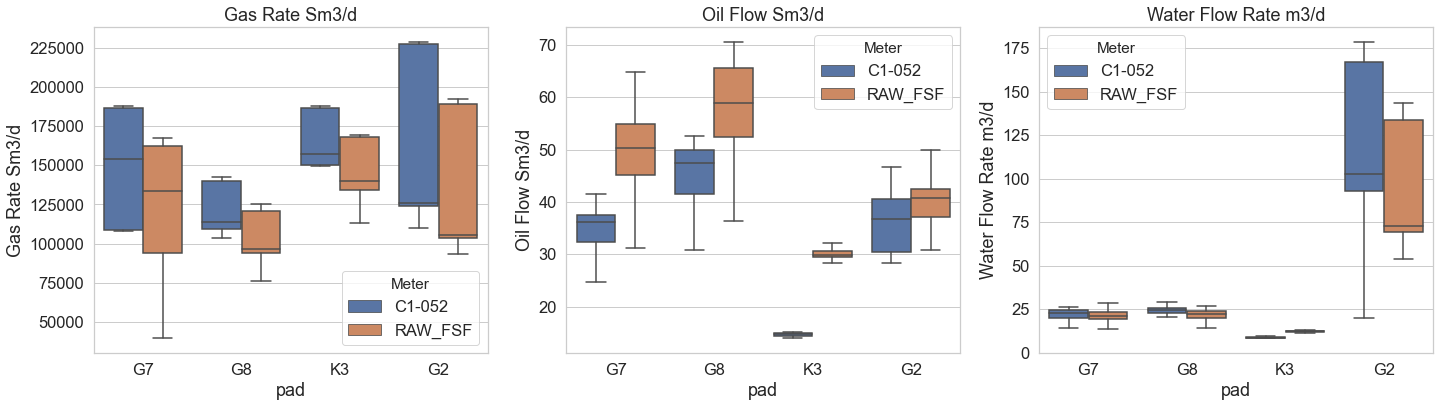

In [9]:
well1 = well.copy()
#well = well.drop(well[(well['Test'] == 'PAD-G2') & (well['CHOKE'] != '40')].index)

well1 = well1[well1['pad'] != '3001']


well1 = well1[well1['Meter'] != 'PVT1']
well1 = well1[well1['Meter'] != 'PVT2']
well1 = well1[well1['Meter'] != 'PVT3']
well1 = well1[well1['Meter'] != 'PVT4']
well1 = well1[well1['Meter'] != 'PVT5']
well1 = well1[well1['Meter'] != 'PVT6']
well1 = well1[well1['Meter'] != 'PVT7']
well1 = well1[well1['Meter'] != 'PVT8']
well1 = well1[well1['Meter'] != 'PVT9']
well1 = well1[well1['Meter'] != 'PVT10']
well1 = well1[well1['Meter'] != 'PVT11']
well1 = well1[well1['Meter'] != 'SEP']
well1 = well1[well1['Meter'] != 'C1-038']
#well1 = well1[well1['Meter'] != 'C1-052']
well1 = well1[well1['Meter'] != 'C1-08125']
well1 = well1[well1['Meter'] != 'C1-0.2']
well1 = well1[well1['Meter'] != 'XL10']
#well1 = well1[well1['Meter'] != 'RAW_FSF']
"""

well1 = well1[well1['Meter'] != 'sep-movil-r1']
#well1 = well1[well1['Meter'] != 'sep-movil-r2']
well1 = well1[well1['Meter'] != 'sep-movil-r3']
#well1 = well1[well1['Meter'] != 'sep-movil-r4']
well1 = well1[well1['Meter'] != 'sep-movil-r5-fsf']
"""
#well1 = well1[well1['Meter'] != 'PVT10']
#well1 = well1[well1['Meter'] != 'PAD-G2']


fig1, ax = plt.subplots(1,3,figsize=(24,6))
ax[0].set_title('Gas Rate Sm3/d')
ax[1].set_title('Oil Flow Sm3/d')
ax[2].set_title('Water Flow Rate m3/d')
sns.boxplot(y='Gas Rate Sm3/d', x='pad', data=well1, hue='Meter', orient='v' ,showfliers = False, ax=ax[0])
sns.boxplot(y='Oil Flow Sm3/d', x='pad', data=well1, hue='Meter', orient='v' , showfliers = False,ax=ax[1])
sns.boxplot(y='Water Flow Rate m3/d', x='pad', data=well1, hue='Meter',orient='v' , showfliers = False,ax=ax[2])
plt.show()


Statistics

In [108]:
#well = well[well['WELL Name'] != 'LCA-3001']

well['Sep. Static Pressure psig'] = well['Sep. Static Pressure psig'].astype(float)
well['Sep. Gas Temp deg C'] = well['Sep. Gas Temp deg C'].astype(float)
well['GasDen[kg/m3]'] = well['GasDen[kg/m3]'].astype(float)


well.groupby(['WELL Name','Meter'])['GOR'].describe()

d = well.groupby(['WELL Name','Meter'])[['CHOKE','Gas Rate Sm3/d','Oil Flow Sm3/d','Water Flow Rate m3/d','GOR','GWR','WLR','Sep. Gas Temp deg C','Sep. Static Pressure psig','DP[Bar]', 'Temperature[C]',
       'Velocity[m/s]', 'Quality',       
       'GVF[%]','GasDen[kg/m3]','GasVisc[cP]', 
       'LiqDen[kg/m3]', 'LiqVisc[cP]']].mean()
d.reset_index(level=0, inplace=True)
d.reset_index(level=0, inplace=True)

#d.to_csv(r'D:\OneDrive\OneDrive - WFT\Compartido\Well_Datasets\La_Calera_Pluspetrol\Post_Process\groupby_lc.csv')
ds = well.groupby(['pad','Meter'])[['CHOKE','Gas Rate Sm3/d','Oil Flow Sm3/d','Water Flow Rate m3/d','GOR','GWR','WLR','Sep. Gas Temp deg C','Sep. Static Pressure psig','DP[Bar]', 'Temperature[C]',
       'Velocity[m/s]', 'Quality',       
       'GVF[%]','GasDen[kg/m3]','GasVisc[cP]', 
       'LiqDen[kg/m3]', 'LiqVisc[cP]']].mean()
ds.reset_index(level=0, inplace=True)
ds.reset_index(level=0, inplace=True)

#pd.pivot_table(d,index=['Meter'],values=["Gas Rate Sm3/d",'Oil Flow Sm3/d','Water Flow Rate m3/d'],aggfunc=np.sum)
#d.groupby(['WELL Name','Meter'])[['Gas Rate Sm3/d','Oil Flow Sm3/d','Water Flow Rate m3/d','GOR','GWR','WLR']].mean()

d1 = d.copy()

#d1 = d1[d1['Meter'] != 'PVT1']
#d1 = d1[d1['Meter'] != 'PVT2']
#d1 = d1[d1['Meter'] != 'PVT3']
#d1 = d1[d1['Meter'] != 'PVT4']
#d1 = d1[d1['Meter'] != 'PVT5']
#d1 = d1[d1['Meter'] != 'PVT6']
#d1 = d1[d1['Meter'] != 'PVT7']
#d1 = d1[d1['Meter'] != 'PVT8']
#d1 = d1[d1['Meter'] != 'RAW_FSF']
#d1
d.columns
#d1.to_csv(r"D:\OneDrive\OneDrive - WFT\Compartido\Well_Datasets\La_Calera_Pluspetrol\Post_Process\sim_logs\run2_files\avg_bypad.csv", index=False, encoding='utf-8-sig')
#d1.to_csv(r"D:\OneDrive\OneDrive - WFT\Compartido\Well_Datasets\La_Calera_Pluspetrol\Post_Process\sim_logs\run2_files\avg_bywell.csv", index=False, encoding='utf-8-sig')

Index(['Meter', 'WELL Name', 'Gas Rate Sm3/d', 'Oil Flow Sm3/d',
       'Water Flow Rate m3/d', 'GOR', 'GWR', 'WLR', 'Sep. Gas Temp deg C',
       'Sep. Static Pressure psig', 'DP[Bar]', 'Temperature[C]',
       'Velocity[m/s]', 'Quality', 'GVF[%]', 'GasDen[kg/m3]', 'GasVisc[cP]',
       'LiqDen[kg/m3]', 'LiqVisc[cP]'],
      dtype='object')

In [53]:
#d = d[d['Meter'] != 'PVT1']
#d = d[d['Meter'] != 'PVT2']
d = d[d['Meter'] != 'PVT3']
d = d[d['Meter'] != 'PVT4']
d = d[d['Meter'] != 'PVT5']
d = d[d['Meter'] != 'PVT6']
d = d[d['Meter'] != 'PVT7']
d = d[d['Meter'] != 'PVT8']

import plotly
import plotly.express as px
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np

trace1 = px.scatter(d, x="WELL Name", y="GOR", color="Meter", size='GOR',title="GOR Comparision")
#trace2 = px.scatter(d, x="WELL Name", y="WGR", color="Meter", size='WGR',title="GOR Comparision")

data = trace1
plotly.offline.plot(data, filename='scatter-mode')

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\plotly\offline\offline.py:563: UserWarning:

Your filename `scatter-mode` didn't end with .html. Adding .html to the end of your file.



'scatter-mode.html'

In [111]:
#d1 = ds.copy()
d1 = d.copy()
#d1 = d1[d1['WELL Name'] != 'LCA-3001']

import plotly

import plotly.graph_objs as go

# Create random data with numpy
import numpy as np
import plotly.figure_factory as ff


#by = 'pad' # 'pad' or 'WELL Name'
by = 'WELL Name'

d1 = d1[d1['Meter'] != 'PVT1']
d1 = d1[d1['Meter'] != 'PVT2']
d1 = d1[d1['Meter'] != 'PVT3']
d1 = d1[d1['Meter'] != 'PVT4']
d1 = d1[d1['Meter'] != 'PVT5']
d1 = d1[d1['Meter'] != 'PVT6']
d1 = d1[d1['Meter'] != 'PVT7']
d1 = d1[d1['Meter'] != 'PVT8']
d1 = d1[d1['Meter'] != 'SEP']
d1 = d1[d1['Meter'] != 'PVT9']
d1 = d1[d1['Meter'] != 'PVT10']
d1 = d1[d1['Meter'] != 'PVT11']
#d1 = d1[d1['Meter'] != 'RAW_FSF']
#d1 = d1[d1['Meter'] != 'Post-Processed']
d1 = d1[d1['Meter'] != 'C1-038']
#d1 = d1[d1['Meter'] != 'C1-052']
d1 = d1[d1['Meter'] != 'C1-08125']
d1 = d1[d1['Meter'] != 'C1-0.2']

def figures_to_html(figs, filename="dashboard.html"):
    dashboard = open(filename, 'w')
    dashboard.write("<html><head></head><body>" + "\n")
    for fig in figs:
        inner_html = fig.to_html().split('<body>')[1].split('</body>')[0]
        dashboard.write(inner_html)
    dashboard.write("</body></html>" + "\n")


# Example figures
import plotly.express as px

fig1 = px.scatter(d1, x=by, y="GOR", color='Meter', size='Gas Rate Sm3/d',title="Gas Oil Rate Comparison")
fig2 = px.scatter(d1, x=by, y="GWR", color='Meter', size='Gas Rate Sm3/d',title="Gas Water Rate Comparison")
fig3 = px.scatter(d1, x=by, y="Gas Rate Sm3/d", color='Meter', size='Gas Rate Sm3/d',title="Gas Rate Comparison")
fig4 = px.scatter(d1, x=by, y="Oil Flow Sm3/d", color='Meter', size='Oil Flow Sm3/d',title="Oil Rate Comparison")
fig5 = px.scatter(d1, x=by, y="Water Flow Rate m3/d", color='Meter', size='Water Flow Rate m3/d',title="Water Rate Comparison")
fig1.update_layout(
    font_color="blue",
    legend_title_font_color="green",
    
    font=dict(
        family="Courier New, monospace",
        size=24,
        color="Black"
    )
)
fig2.update_layout(
    font_color="blue",
    legend_title_font_color="green",
    
    font=dict(
        family="Courier New, monospace",
        size=24,
        color="Black"
    )
)
fig3.update_layout(
    font_color="blue",
    legend_title_font_color="green",
    
    font=dict(
        family="Courier New, monospace",
        size=24,
        color="Black"
    )
)
fig4.update_layout(
    font_color="blue",
    legend_title_font_color="green",
    
    font=dict(
        family="Courier New, monospace",
        size=24,
        color="Black"
    )
)
fig5.update_layout(
    font_color="blue",
    legend_title_font_color="green",
    
    font=dict(
        family="Courier New, monospace",
        size=24,
        color="Black"
    )
)
"""

fig6 =  ff.create_table(measureOverPVT)
figures_to_html([fig1, fig2, fig3,fig4,fig5,fig6])

"""


figures_to_html([fig1, fig2, fig3,fig4,fig5])

ref = {'Meter':['Reference','Reference','Reference','Reference','Reference','Reference','Reference','Reference','Reference','Reference','Reference','Reference','Reference'],
       'WELL Name':['LCA-3011','LCA-3001','LCA-3005','LCA-3006','LCA-3007','LCA-3008','LCA-3009','LCA-3010','LCA-3012','LCA-3013','LCA-3083','LCA-3084','LCA-3085'],
                                'Gas Rate Sm3/d' : [100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000],
                                'GOR':[8130,2955,8972,4911,6352,3111,4125,3864,7222,9080,1929,2290,2011],
                                'GWR':[14385,9286,12215,14923,8586,12727,13895,1889,11471,12611,4970,4688,5469]}



d1 = d1.append(pd.DataFrame(ref),ignore_index=True,sort=False)


d1.to_csv(r'D:\OneDrive\OneDrive - WFT\Compartido\Well_Datasets\La_Calera_Pluspetrol\Post_Process\Analytics_files\df\ds_grouped.csv', index=False, encoding='utf-8-sig')

In [6]:
#d1 = ds.copy()

d = d[d['WELL Name'] != 'LCA-3001']
d1 = d.copy()


import plotly

import plotly.graph_objs as go

# Create random data with numpy
import numpy as np
import plotly.figure_factory as ff


#by = 'pad' # 'pad' or 'WELL Name'
by = 'WELL Name'
"""
d1 = d1[d1['Meter'] != 'PVT1']
d1 = d1[d1['Meter'] != 'PVT2']
d1 = d1[d1['Meter'] != 'PVT3']
d1 = d1[d1['Meter'] != 'PVT4']
d1 = d1[d1['Meter'] != 'PVT5']
d1 = d1[d1['Meter'] != 'PVT6']
d1 = d1[d1['Meter'] != 'PVT7']
d1 = d1[d1['Meter'] != 'PVT8']
d1 = d1[d1['Meter'] != 'PVT9']
d1 = d1[d1['Meter'] != 'PVT10']
#d1 = d1[d1['Meter'] != 'C1-038']
#d1 = d1[d1['Meter'] != 'C1-052']
#d1 = d1[d1['Meter'] != 'C1-08125']
#d1 = d1[d1['Meter'] != 'C1-0.2']
d1 = d1[d1['Meter'] != 'SEP']
#d1 = d1[d1['Meter'] != 'RAW_FSF']
"""
def figures_to_html(figs, filename="dashboard_2.html"):
    dashboard = open(filename, 'w')
    dashboard.write("<html><head></head><body>" + "\n")
    for fig in figs:
        inner_html = fig.to_html().split('<body>')[1].split('</body>')[0]
        dashboard.write(inner_html)
    dashboard.write("</body></html>" + "\n")

    

# Example figures
import plotly.express as px

#fig1 = px.scatter(d1, x=by, y='Sep. Gas Temp deg C', color='Meter', size='Gas Rate Sm3/d',title="Temperature Comparison")
#fig2 = px.scatter(d1, x=by, y='Sep. Static Pressure psig', color='Meter', size='Gas Rate Sm3/d',title="Pressure Comparison")
fig1 = px.scatter(d1, x=by, y='Velocity[m/s]', color='Meter', size='Gas Rate Sm3/d',title="Velocity Comparison")
fig2 = px.scatter(d1, x=by, y='Quality', color='Meter', size='Gas Rate Sm3/d',title="Quality Comparison")
fig3 = px.scatter(d1, x=by, y='GasDen[kg/m3]', color='Meter', size='Gas Rate Sm3/d',title="Gas SG Comparison")
fig4 = px.scatter(d1, x=by, y='LiqDen[kg/m3]', color='Meter', size='Oil Flow Sm3/d',title="Liquid SG Comparison")
fig5 = px.scatter(d1, x=by, y='LiqVisc[cP]', color='Meter', size='Water Flow Rate m3/d',title="Liquid Visc Comparison")


#'Velocity[m/s]', 'Quality'

#fig6 =  ff.create_table(measureOverPVT)
fig1.update_layout(
    font_color="blue",
    legend_title_font_color="green",
    
    font=dict(
        family="Courier New, monospace",
        size=24,
        color="Black"
    )
)
fig2.update_layout(
    font_color="blue",
    legend_title_font_color="green",
    
    font=dict(
        family="Courier New, monospace",
        size=24,
        color="Black"
    )
)
fig3.update_layout(
    font_color="blue",
    legend_title_font_color="green",
    
    font=dict(
        family="Courier New, monospace",
        size=24,
        color="Black"
    )
)
fig4.update_layout(
    font_color="blue",
    legend_title_font_color="green",
    
    font=dict(
        family="Courier New, monospace",
        size=24,
        color="Black"
    )
)
fig5.update_layout(
    font_color="blue",
    legend_title_font_color="green",
    
    font=dict(
        family="Courier New, monospace",
        size=24,
        color="Black"
    )
)

figures_to_html([fig1, fig2, fig3,fig4,fig5])



In [89]:
#d1 = d.copy()
d1 = ds.copy()

d1 = d1[d1['Meter'] != 'PVT1']
d1 = d1[d1['Meter'] != 'PVT2']
d1 = d1[d1['Meter'] != 'PVT3']
d1 = d1[d1['Meter'] != 'PVT4']
d1 = d1[d1['Meter'] != 'PVT5']
d1 = d1[d1['Meter'] != 'PVT6']
d1 = d1[d1['Meter'] != 'PVT7']
d1 = d1[d1['Meter'] != 'PVT8']
d1 = d1[d1['Meter'] != 'PVT9']
d1 = d1[d1['Meter'] != 'PVT10']
d1 = d1[d1['Meter'] != 'RAW_FSF']
d1 = d1[d1['Meter'] != 'C1-038']
#d1 = d1[d1['Meter'] != 'C1-052']
d1 = d1[d1['Meter'] != 'C1-08125']
d1 = d1[d1['Meter'] != 'C1-0.2']


def f(a):
    z = {}
    b = d[d['Meter']=='SEP'][['Gas Rate Sm3/d','Oil Flow Sm3/d','Water Flow Rate m3/d','GOR','GWR','WLR']].mean()
    z['Gas Rate diff %'] = ((a['Gas Rate Sm3/d'] *1.21 - b['Gas Rate Sm3/d'])/ b['Gas Rate Sm3/d'] * 100).mean()
    z['Oil Rate diff %'] = ((a['Oil Flow Sm3/d'] *1.21 - b['Oil Flow Sm3/d'])/ b['Oil Flow Sm3/d'] * 100).mean()
    z['Water Rate diff %'] = ((a['Water Flow Rate m3/d'] * 1.21  - b['Water Flow Rate m3/d'])/ b['Water Flow Rate m3/d'] * 100).mean()
    z['GOR diff %'] = ((a['GOR'] - b['GOR'])/ b['GOR'] * 100).mean()
    z['GWR diff %'] = ((a['GWR'] - b['GWR'])/ b['GWR'] * 100).mean()
    z['WLR diff %'] = ((a['WLR'] - b['WLR'])/ b['WLR'] * 100).mean()
    return pd.Series(z, index=('Gas Rate diff %', 'Oil Rate diff %', 'Water Rate diff %', 'GOR diff %','GWR diff %','WLR diff %'))

#.sort_values('Tot_Sales',ascending=False)

#measureOverPVT = d1.groupby(['WELL Name','Meter'],as_index=True).apply(f)
measureOverPVT = d1.groupby(['pad','Meter'],as_index=True).apply(f)


measureOverPVT.reset_index(level=0, inplace=True)
measureOverPVT.reset_index(level=0, inplace=True)
                           
#measureOverPVT[measureOverPVT['WELL Name']=='LCA-3009'].sort_values('Gas Rate diff %',ascending=False)

#measureOverPVT[measureOverPVT['pad']=='G2'].sort_values('Gas Rate diff %',ascending=True)


xyz = measureOverPVT[measureOverPVT['Meter']!='SEP'].sort_values('Gas Rate diff %',ascending=True)
xyz
#xyz.to_csv(r"D:\OneDrive\OneDrive - WFT\Compartido\Well_Datasets\La_Calera_Pluspetrol\Post_Process\sim_logs\run2_files\avg_bywell.csv", index=False, encoding='utf-8-sig')

#xyz.to_csv(r"D:\OneDrive\OneDrive - WFT\Compartido\Well_Datasets\La_Calera_Pluspetrol\Post_Process\sim_logs\run2_files\avg_bypad.csv", index=False, encoding='utf-8-sig')

#measureOverPVT.head()

,Meter,pad,Gas Rate diff %,Oil Rate diff %,Water Rate diff %,GOR diff %,GWR diff %,WLR diff %
0,Post-Processed,3001,-60.696092,-63.191784,-73.339257,-27.088609,NaN,-12.345038
8,PVT11,G8,-21.395943,3.955749,-0.563906,-47.683131,NaN,6.187905
9,Post-Processed,G8,-20.002870,3.021597,-1.177147,-46.255592,NaN,6.385114
5,PVT11,G7,-2.508474,-20.165912,-9.223842,-13.180199,NaN,18.276887
6,Post-Processed,G7,-0.758799,-21.376218,-10.347331,-10.112999,NaN,18.483285
2,PVT11,G2,2.687622,-15.444123,387.960897,-11.837280,NaN,126.595077
3,Post-Processed,G2,4.509137,-16.054157,385.798421,-9.602482,NaN,126.756242
11,PVT11,K3,7.124050,-65.121575,-63.049639,109.310766,NaN,13.238947
12,Post-Processed,K3,9.071314,-66.498516,-64.405480,121.916446,NaN,13.439188


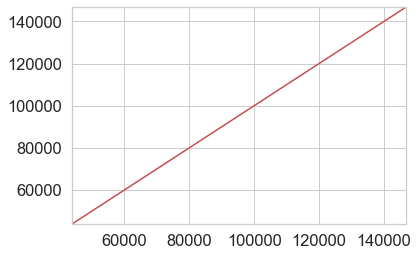

In [138]:
#plt.scatter(x['Gas Rate Sm3/d'] , y['Gas Rate Sm3/d'])
#plt.plot()


# Scatter Plot
j = x['Gas Rate Sm3/d']
k =  y['Gas Rate Sm3/d']

lineStart = x['Gas Rate Sm3/d'].min() 
lineEnd = x['Gas Rate Sm3/d'].max()  

plt.figure()
plt.scatter(j, k, color = 'k', alpha=0.5)
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.show()

In [74]:
d = well.groupby(['WELL Name','Meter','CHOKE'])[['Gas Rate Sm3/d','Oil Flow Sm3/d','Water Flow Rate m3/d','GOR','GWR','WLR','Sep. Gas Temp deg C','Sep. Static Pressure psig','DP[Bar]', 'Temperature[C]',
       'Velocity[m/s]', 'Quality',       
       'GVF[%]','GasDen[kg/m3]','GasVisc[cP]', 
       'LiqDen[kg/m3]', 'LiqVisc[cP]']].mean()
d.reset_index(level=0, inplace=True)
d.reset_index(level=0, inplace=True)
d.reset_index(level=0, inplace=True)



d3 = d[d['Meter']=='SEP']
#d3 = d3[d3['CHOKE']=='84'] 

group = d3.pivot_table(index='WELL Name',values=['Gas Rate Sm3/d','Oil Flow Sm3/d', 'Water Flow Rate m3/d','WLR','Sep. Gas Temp deg C','Sep. Static Pressure psig'],aggfunc='mean')
    
group

,Gas Rate Sm3/d,Oil Flow Sm3/d,Sep. Gas Temp deg C,Sep. Static Pressure psig,WLR,Water Flow Rate m3/d
WELL Name,,,,,,
LCA-3001,43070.142092,12.292786,34.231111,1345.443494,0.303740,4.730681
LCA-3005,133767.076078,28.166342,43.036828,1322.599781,0.293485,11.965530
LCA-3006,200371.064226,35.515742,48.798795,1319.151098,0.299121,15.078487
LCA-3007,243948.297896,35.444586,47.519930,1316.538799,0.432941,27.072842
LCA-3008,145864.524452,43.615552,45.357523,1316.099604,0.264653,16.038138
LCA-3009,120704.667428,34.758430,52.481689,1310.559709,0.296810,15.329652
LCA-3010,159837.621636,44.433650,49.842577,1314.943351,0.228532,13.972650
LCA-3011,193115.501317,21.109552,49.042934,1293.391147,0.368800,12.343463
LCA-3012,206477.509629,22.819015,48.461783,1293.784162,0.390013,14.584979
